# Interday Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import signal

In [2]:
# Import data
df = pd.read_excel('hsi_price_data.xlsx', sheet_name = None)

## Data Cleaning

In [3]:
for i in df:
    print(i, df[i].isna().sum(), sep='\n', end = "\n"+"="*30+"\n" if i != list(df.keys())[-1] else "")

Intraday_data
Datetime         0
HSI_Price        0
Date             0
Time             0
9:30 - 9:59      0
10:00 - 10:29    0
10:30 - 10:59    0
11:00 - 11:29    0
11:30 - 11:59    0
13:00 - 13:29    0
13:30 - 13:59    0
14:00 - 14:29    0
14:30 - 14:59    0
15:00 - 15:29    0
15:30 - 15:59    0
dtype: int64
Interday_data
Date             0
Price          251
Unnamed: 2    9167
Unnamed: 3    9167
Unnamed: 4    9167
Unnamed: 5    9167
Unnamed: 6    9167
Unnamed: 7    9167
Unnamed: 8    9167
Unnamed: 9    9166
dtype: int64

In [4]:
for i in df:
    for j in df[i]:
        j != "Datetime" and j != "Date" and df[i][j].interpolate(method = 'linear', inplace = True)
df["Interday_data"].dropna(axis = 1, inplace = True)

In [5]:
for i in df:
    print(i, df[i].isna().sum(), sep='\n', end = "\n"+"="*30+"\n" if i != list(df.keys())[-1] else "")

Intraday_data
Datetime         0
HSI_Price        0
Date             0
Time             0
9:30 - 9:59      0
10:00 - 10:29    0
10:30 - 10:59    0
11:00 - 11:29    0
11:30 - 11:59    0
13:00 - 13:29    0
13:30 - 13:59    0
14:00 - 14:29    0
14:30 - 14:59    0
15:00 - 15:29    0
15:30 - 15:59    0
dtype: int64
Interday_data
Date     0
Price    0
dtype: int64

# Interday_data

## Detrend

In [6]:
df1 = df["Interday_data"]
df1.index = pd.to_datetime(df1.Date)

In [7]:
df1

,Date,Price
Date,,
1987-01-02,1987-01-02,2540.100098
1987-01-05,1987-01-05,2552.399902
1987-01-06,1987-01-06,2583.899902
1987-01-07,1987-01-07,2607.100098
1987-01-08,1987-01-08,2603.300049
...,...,...
2023-02-06,2023-02-06,21222.160156
2023-02-07,2023-02-07,21298.699219
2023-02-08,2023-02-08,21283.519531


<Axes: xlabel='Date'>

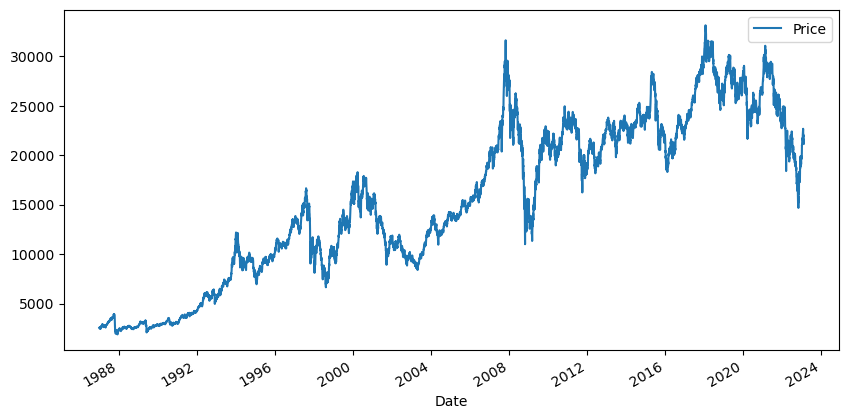

In [8]:
df1.plot(figsize = [10, 5], x = 'Date', y = 'Price')

In [9]:
from scipy import signal
df1_detrended = signal.detrend(df1.Price)
df1_detrended = pd.DataFrame(df1_detrended, index = df1.index, columns = [df1.columns[1]])

In [10]:
df1_detrended

,Price
Date,
1987-01-02,210.999739
1987-01-05,220.454116
1987-01-06,249.108688
1987-01-07,269.463457
1987-01-08,262.817980
...,...
2023-02-06,-7176.747417
2023-02-07,-7103.053782
2023-02-08,-7121.078897


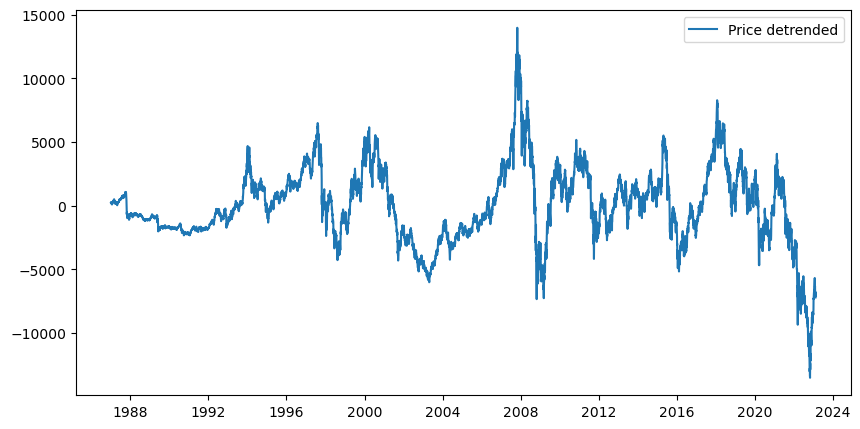

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df1_detrended.index, df1_detrended["Price"], label="Price detrended")
plt.legend(loc='best')
plt.show()

## 1-hot encoding

In [12]:
day_of_week = df1.index.dayofweek
month_of_year = df1.index.month

In [13]:
day_of_week_dummies = pd.get_dummies(day_of_week, prefix="day")
month_of_year_dummies = pd.get_dummies(month_of_year, prefix="month")

In [14]:
day_of_week_dummies.head() # day_0: Mon, day_1: Tue, ..., day_5: Sat

,day_0,day_1,day_2,day_3,day_4,day_5
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0


In [15]:
display(month_of_year_dummies)

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9162,0,1,0,0,0,0,0,0,0,0,0,0
9163,0,1,0,0,0,0,0,0,0,0,0,0
9164,0,1,0,0,0,0,0,0,0,0,0,0
9165,0,1,0,0,0,0,0,0,0,0,0,0


In [16]:
X = pd.concat([day_of_week_dummies, month_of_year_dummies], axis=1)
y = df1_detrended

In [17]:
modelA = smf.ols(formula="Price ~ C(day_of_week, Treatment(reference = 5)) + C(month_of_year)", data = df1).fit()

In [18]:
print(modelA.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2944
Date:                Sun, 12 Mar 2023   Prob (F-statistic):              0.997
Time:                        13:30:24   Log-Likelihood:                -95508.
No. Observations:                9167   AIC:                         1.911e+05
Df Residuals:                    9150   BIC:                         1.912e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [19]:
modelA.rsquared

0.0005146180986187465

In [20]:
modelA.params # T.5 (Sat) is not included because the stock market would be normally closed on Saturdays

Intercept                                      18572.723365
C(day_of_week, Treatment(reference=5))[T.0]    -3259.075802
C(day_of_week, Treatment(reference=5))[T.1]    -3142.963362
C(day_of_week, Treatment(reference=5))[T.2]    -3069.418088
C(day_of_week, Treatment(reference=5))[T.3]    -3066.302042
C(day_of_week, Treatment(reference=5))[T.4]    -3148.970909
C(month_of_year)[T.2]                           -140.229967
C(month_of_year)[T.3]                           -220.710445
C(month_of_year)[T.4]                           -309.215773
C(month_of_year)[T.5]                           -162.698112
C(month_of_year)[T.6]                            -27.739602
C(month_of_year)[T.7]                             71.067816
C(month_of_year)[T.8]                            124.062011
C(month_of_year)[T.9]                           -135.514917
C(month_of_year)[T.10]                          -306.581303
C(month_of_year)[T.11]                           229.437698
C(month_of_year)[T.12]                  

In [21]:
# Calculate sell-to-buy ratio for day of the week
buy_mean = df1.groupby(df1.index.dayofweek)['Price'].mean().min()
sell_mean = df1.groupby(df1.index.dayofweek)['Price'].mean().max()

s2b_day_ratio = sell_mean / buy_mean

# Calculate sell-to-buy ratio for month of the year
buy_mean = df1.groupby(df1.index.month)['Price'].mean().min()
sell_mean = df1.groupby(df1.index.month)['Price'].mean().max()

s2b_month_ratio = sell_mean / buy_mean


In [22]:
round(s2b_day_ratio, 4)

1.2208

In [23]:
round(s2b_month_ratio, 4)

1.0354

## Optional method

In [24]:
effect_by_day = modelA.params[1:6]
effect_by_month = modelA.params[6:]

In [25]:
q1 = 0.25
q2 = 0.75

In [26]:
formula = "Price ~ C(day_of_week, Treatment(reference = 5)) + C(month_of_year)"
model = smf.quantreg(formula, df1)

In [27]:
results = pd.DataFrame(columns=["quantile", "day", "month", "price"])

In [28]:
for q in [q1, q2]:
    # Fit the quantile regression model
    quantile_model = model.fit(q=q)

    coef_d = quantile_model.params[1:6]
    coef_m = quantile_model.params[6:]
    day = coef_d.index[coef_d == coef_d.min() if q == q1 else coef_d == coef_d.max()][0]
    month = coef_m.index[coef_m == coef_m.min() if q == q1 else coef_m == coef_m.max()][0]

    # Add the results to the DataFrame
    results = results.append({"quantile": q, "day": day, "month": month, "price": coef_d[day]}, ignore_index=True)


/var/folders/j0/5r4rz32s725cs8d72phm110m0000gn/T/ipykernel_63316/1142637781.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"quantile": q, "day": day, "month": month, "price": coef_d[day]}, ignore_index=True)
/var/folders/j0/5r4rz32s725cs8d72phm110m0000gn/T/ipykernel_63316/1142637781.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"quantile": q, "day": day, "month": month, "price": coef_d[day]}, ignore_index=True)


In [29]:
for q in [q1, q2]:
    quantile_model = model.fit(q=q)
    print(quantile_model.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  Price   Pseudo R-squared:             0.001696
Model:                       QuantReg   Bandwidth:                       1645.
Method:                 Least Squares   Sparsity:                    2.025e+04
Date:                Sun, 12 Mar 2023   No. Observations:                 9167
Time:                        13:30:25   Df Residuals:                     9150
                                        Df Model:                           16
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    1.809e+04   8016.449      2.256      0.024    2371.871    3.38e+04
C(day_of_week, Treatment(reference=5))[T.0] -8685.5000   8012.495     -1.084      0.278   -2.44e+04    7020.779

In [30]:
results

,quantile,day,month,price
0,0.25,"C(day_of_week, Treatment(reference=5))[T.0]",C(month_of_year)[T.4],-8685.500000
1,0.75,"C(day_of_week, Treatment(reference=5))[T.2]",C(month_of_year)[T.10],4008.800783


In [31]:
# Calculate sell-to-buy ratio for day of the week
buy_mean = df1.groupby(df1.index.dayofweek == 0)['Price'].mean().min()
sell_mean = df1.groupby(df1.index.dayofweek == 2)['Price'].mean().max()

s2b_day_ratio = sell_mean / buy_mean

# Calculate sell-to-buy ratio for month of the year
buy_mean = df1.groupby(df1.index.month == 4)['Price'].mean().min()
sell_mean = df1.groupby(df1.index.month == 11)['Price'].mean().max()

s2b_month_ratio = sell_mean / buy_mean


In [32]:
s2b_day_ratio

1.0122689324393612

In [33]:
s2b_month_ratio

1.0354355503398749